In [176]:
import pandas as pd #for data cleaning
import numpy as np #for numerical data handling
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for advanced visualization
from scipy import stats #statistical tests

# **Data Cleaning**

## **Extract data from customer sheet in messy excel**


In [177]:
folder = 'dataset'
file_path = f'{folder}/Bank_Churn_Messy.xlsx'

In [178]:
customer_df = pd.read_excel(file_path,sheet_name=0)
customer_df = pd.DataFrame(customer_df)

In [179]:
customer_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


## **CustomerID Type Checking**

In [180]:
customer_df['CustomerId'].dtype

dtype('int64')

In [181]:
customer_df['CustomerId'] = customer_df['CustomerId'].astype('string')

In [182]:
customer_df['CustomerId'].dtype

string[python]

## **Extract data from account info sheet in messy excel**

In [183]:
account_df = pd.read_excel(file_path,sheet_name=1)
account_df = pd.DataFrame(account_df)

In [184]:
account_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [185]:
account_df['CustomerId'].dtype

dtype('int64')

In [186]:
account_df['CustomerId'] = account_df['CustomerId'].astype('string')

In [187]:
account_df['CustomerId'].dtype

string[python]

## **Merge Data from account and customer**

In [188]:
bank_account_df = account_df.merge(customer_df,on='CustomerId',how='left')

In [189]:
account_df['CustomerId'].count()

np.int64(10002)

In [190]:
customer_df['CustomerId'].count()

np.int64(10001)

In [191]:
bank_account_df['CustomerId'].count()

np.int64(10004)

## **Check Duplicate Rows**

In [192]:
bank_account_df[bank_account_df.duplicated(keep=False)]

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,Tenure_y,EstimatedSalary
0,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
10000,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78
10001,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78
10002,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78
10003,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78


In [193]:
bank_account_df = bank_account_df.drop_duplicates()

In [194]:
bank_account_df[bank_account_df.duplicated(keep=False)]

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,Tenure_y,EstimatedSalary


In [195]:
bank_account_df['CustomerId'].count()

np.int64(10000)

In [196]:
bank_account_df.columns = bank_account_df.columns.str.strip().str.lower().str.replace(' ','_')

In [197]:
bank_account_df.columns

Index(['customerid', 'balance', 'numofproducts', 'hascrcard', 'tenure_x',
       'isactivemember', 'exited', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure_y', 'estimatedsalary'],
      dtype='object')

## **Check Duplicate Columns**

In [198]:
(bank_account_df['tenure_x'] == bank_account_df['tenure_y']).unique()

array([ True])

In [199]:
bank_account_df.drop(columns='tenure_y',inplace=True)

In [200]:
bank_account_df.columns

Index(['customerid', 'balance', 'numofproducts', 'hascrcard', 'tenure_x',
       'isactivemember', 'exited', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'estimatedsalary'],
      dtype='object')

## **Standardizing Column Name for preventing coding error**

In [201]:
bank_account_df = bank_account_df.rename(columns={'tenure_x':'tenure'})

In [202]:
bank_account_df.columns

Index(['customerid', 'balance', 'numofproducts', 'hascrcard', 'tenure',
       'isactivemember', 'exited', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'estimatedsalary'],
      dtype='object')

## **Check DataType Mismatch & Fix**

In [203]:
bank_account_df.dtypes

customerid         string[python]
balance                    object
numofproducts               int64
hascrcard                  object
tenure                      int64
isactivemember             object
exited                      int64
surname                    object
creditscore                 int64
geography                  object
gender                     object
age                       float64
estimatedsalary            object
dtype: object

In [204]:
bank_account_df['hascrcard'].unique()

array(['Yes', 'No'], dtype=object)

In [205]:
bank_account_df['estimatedsalary']

0        €101348.88
2        €112542.58
3        €113931.57
4         €93826.63
5          €79084.1
            ...    
9996      €96270.64
9997     €101699.77
9998      €42085.58
9999      €92888.52
10000     €38190.78
Name: estimatedsalary, Length: 10000, dtype: object

In [206]:
bank_account_df[['estimatedsalary','balance']] = bank_account_df[['estimatedsalary','balance']].astype('string')

In [207]:
# bank_account_df['estimatedsalary'].astype(float)

In [208]:
bank_account_df[['estimatedsalary','balance']] = bank_account_df[['estimatedsalary','balance']].replace(r'[€,]','',regex=True)

In [209]:
bank_account_df[['estimatedsalary','balance']] = bank_account_df[['estimatedsalary','balance']].astype(float)

In [210]:
bank_account_df.dtypes

customerid         string[python]
balance                   float64
numofproducts               int64
hascrcard                  object
tenure                      int64
isactivemember             object
exited                      int64
surname                    object
creditscore                 int64
geography                  object
gender                     object
age                       float64
estimatedsalary           float64
dtype: object

In [211]:
bank_account_df['hascrcard'].unique()

array(['Yes', 'No'], dtype=object)

In [212]:
bank_account_df['isactivemember'].unique()

array(['Yes', 'No'], dtype=object)

In [213]:
bank_account_df[['hascrcard','isactivemember']] = bank_account_df[['hascrcard','isactivemember']].astype('string').replace({'Yes':'1','No':'0'})

In [214]:
bank_account_df[['hascrcard','isactivemember']] = bank_account_df[['hascrcard','isactivemember']].astype('int')

In [215]:
bank_account_df[['geography','gender']] = bank_account_df[['geography','gender']].astype('string')

In [216]:
bank_account_df['geography'] = bank_account_df['geography'].str.lower().str.strip()

In [217]:
bank_account_df['gender'] = bank_account_df['gender'].str.lower().str.strip()

In [218]:
bank_account_df.map(type).nunique()

customerid         1
balance            1
numofproducts      1
hascrcard          1
tenure             1
isactivemember     1
exited             1
surname            2
creditscore        1
geography          1
gender             1
age                1
estimatedsalary    1
dtype: int64

In [219]:
bank_account_df.isnull().sum()

customerid         0
balance            0
numofproducts      0
hascrcard          0
tenure             0
isactivemember     0
exited             0
surname            3
creditscore        0
geography          0
gender             0
age                3
estimatedsalary    0
dtype: int64

In [220]:
bank_account_df[bank_account_df['age'].isnull()]

,customerid,balance,numofproducts,hascrcard,tenure,isactivemember,exited,surname,creditscore,geography,gender,age,estimatedsalary
29,15728693,141349.43,1,1,3,1,0,NaN,574,germany,female,NaN,-999999.0
122,15580203,120193.42,1,0,6,0,0,NaN,674,spain,male,NaN,-999999.0
9390,15756954,0.00,1,1,2,1,0,NaN,538,france,female,NaN,-999999.0


In [221]:
bank_account_df = bank_account_df.dropna(subset=['balance','age','estimatedsalary','creditscore'])

In [222]:
bank_account_df['age'] = bank_account_df['age'].astype(int)

In [223]:
bank_account_df.dtypes

customerid         string[python]
balance                   float64
numofproducts               int64
hascrcard                   int64
tenure                      int64
isactivemember              int64
exited                      int64
surname                    object
creditscore                 int64
geography          string[python]
gender             string[python]
age                         int64
estimatedsalary           float64
dtype: object

In [224]:
# bank_account_df = bank_account_df.drop(columns=['customerid','surname'])

In [225]:
bank_account_df.map(type).nunique()

customerid         1
balance            1
numofproducts      1
hascrcard          1
tenure             1
isactivemember     1
exited             1
surname            1
creditscore        1
geography          1
gender             1
age                1
estimatedsalary    1
dtype: int64

## **Standardize categorical data**

In [226]:
bank_account_df['geography'].unique()

<StringArray>
['fra', 'spain', 'french', 'france', 'germany']
Length: 5, dtype: string

In [227]:
bank_account_df['geography'] = bank_account_df['geography'].replace(['fra','french'],'france')

In [228]:
bank_account_df['geography'].unique()

<StringArray>
['france', 'spain', 'germany']
Length: 3, dtype: string

In [229]:
bank_account_df['gender'].unique()

<StringArray>
['female', 'male']
Length: 2, dtype: string

In [230]:
bank_account_df.describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,76482.679807,1.530359,0.515055,5.013204,0.515055,0.203761,650.545364,38.922077,100092.222656
std,62397.174721,0.581669,0.499798,2.892364,0.499798,0.402814,96.657932,10.489072,57518.775702
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,350.000000,18.000000,11.580000
25%,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,584.000000,32.000000,50974.570000
50%,97188.620000,1.000000,1.000000,5.000000,1.000000,0.000000,652.000000,37.000000,100236.020000
75%,127642.440000,2.000000,1.000000,7.000000,1.000000,0.000000,718.000000,44.000000,149399.700000
max,250898.090000,4.000000,1.000000,10.000000,1.000000,1.000000,850.000000,92.000000,199992.480000


There are 30% no saving customers and saving customers' balance behaviors are stable. To study difference between no saving and saving customers. While most customers used only 1 or 2 products, few customers only used more than 2 products. Credit card is direct related with active status. To increase more engagement, we should provide credit card plan. Most customers are long term customers around 5 years and longest term is 10 year old customers. New customers like 0 and oldest customers like 10 is quite few. 20% customers are churner so we need to explore why churn. There are few customers with worst credit score. although there are around 6% customers who have below 500 credit score, among them 30% of low credit score customers have higher income and saving. We can approve suitable low risk loan using strict policies to prevent churn customers. Our target customer is around 32 to 44. expanded range is 24- 60. Customer age do not impact on saving.74% of customers' income is around 50 k to 2 lakhs,14% of customers are 20k to 50 k. Below 20 k is around 10% of customers. So, most of customers' income range is 20k to 2 lakhs. 50% of our customers located in france and each 25% of customers exist in spain and germany. Male and female customers count are not quite different. so we should plan for further project with gender equality.

In [231]:
bank_account_df['geography'].value_counts()

geography
france     5013
germany    2508
spain      2476
Name: count, dtype: Int64

In [232]:
bank_account_df['gender'].value_counts()

gender
male      5456
female    4541
Name: count, dtype: Int64

In [233]:
bank_account_df[bank_account_df['estimatedsalary']<=20000].describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,71806.964625,1.529412,0.522312,4.997972,0.522312,0.200811,649.282961,38.641988,9820.001085
std,63053.008010,0.580256,0.499755,2.864450,0.499755,0.400811,98.407100,10.370723,5815.136401
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,395.000000,18.000000,11.580000
25%,0.000000,1.000000,0.000000,2.250000,0.000000,0.000000,580.000000,31.000000,4655.937500
50%,91364.485000,1.000000,1.000000,5.000000,1.000000,0.000000,648.500000,37.000000,9681.900000
75%,126206.862500,2.000000,1.000000,7.000000,1.000000,0.000000,716.000000,43.000000,14711.302500
max,206663.750000,4.000000,1.000000,10.000000,1.000000,1.000000,850.000000,77.000000,19998.310000


In [234]:
bank_account_df['estimatedsalary_group'] = pd.cut(bank_account_df['estimatedsalary'],bins=[0,1000,20000,50000,100000,150000,200000,400000],labels=['below 1k','1k-20k','20k-50k','50k - 100k','100k - 150k','150k - 200k','above 200k'])
bank_account_df['estimatedsalary_group'].value_counts(normalize=True)

estimatedsalary_group
100k - 150k    0.255377
50k - 100k     0.253676
150k - 200k    0.245574
20k-50k        0.146744
1k-20k         0.092728
below 1k       0.005902
above 200k     0.000000
Name: proportion, dtype: float64

In [235]:
bank_account_df['age_group'] = pd.cut(bank_account_df['age'],bins=[17,20,23,32,44,60,120],labels=['18-20','21-23','24-32','33-44','45-60','above 60'])

In [236]:
bank_account_df[bank_account_df['balance']==0]['age_group'].value_counts()

age_group
33-44       1780
24-32        942
45-60        600
above 60     167
21-23         91
18-20         36
Name: count, dtype: int64

In [237]:
bank_account_df[bank_account_df['creditscore']< 500].describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000
mean,80294.231329,1.515823,0.468354,5.077532,0.468354,0.237342,462.925633,38.908228,103307.478418
std,62792.369008,0.579417,0.499393,2.824839,0.499393,0.425790,30.113033,10.265777,57842.565848
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,350.000000,19.000000,878.870000
25%,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,445.000000,32.000000,56598.880000
50%,100697.760000,1.000000,0.000000,5.000000,0.000000,0.000000,470.000000,37.000000,101297.595000
75%,131097.260000,2.000000,1.000000,8.000000,1.000000,0.000000,487.000000,44.000000,155828.382500
max,221532.800000,4.000000,1.000000,10.000000,1.000000,1.000000,499.000000,84.000000,199505.530000


In [238]:
bank_account_df[(bank_account_df['balance']>=100000) &
                 (bank_account_df['estimatedsalary']>=100000) &
                 (bank_account_df['creditscore']<500)
                 ].describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,135566.586975,1.469136,0.419753,5.141975,0.419753,0.228395,461.635802,39.000000,153647.638951
std,23136.398341,0.601993,0.495049,2.906124,0.495049,0.421100,33.325751,11.017772,28212.792104
min,101257.160000,1.000000,0.000000,0.000000,0.000000,0.000000,350.000000,19.000000,100447.530000
25%,117314.232500,1.000000,0.000000,2.250000,0.000000,0.000000,446.750000,32.000000,128459.090000
50%,131601.650000,1.000000,0.000000,6.000000,0.000000,0.000000,468.500000,37.000000,155041.060000
75%,152011.547500,2.000000,1.000000,8.000000,1.000000,0.000000,485.750000,44.000000,176621.162500
max,221532.800000,4.000000,1.000000,10.000000,1.000000,1.000000,499.000000,74.000000,198714.290000


In [239]:
bank_account_df['tenure'].value_counts()

tenure
2     1047
1     1035
7     1028
8     1025
5     1012
3     1008
4      989
9      984
6      966
10     490
0      413
Name: count, dtype: int64

In [240]:
pd.crosstab(bank_account_df['hascrcard'],bank_account_df['exited'],rownames=['Has Credit Card'],colnames=['Churn Status'])

Churn Status,0,1
Has Credit Card,,
0,3546,1302
1,4414,735


In [241]:
bank_account_df[(bank_account_df['hascrcard']==0) &
                 (bank_account_df['exited'] == 0)
                ].describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,3546.000000,3546.000000,3546.0,3546.000000,3546.0,3546.0,3546.000000,3546.000000,3546.000000
mean,72035.243421,1.554992,0.0,5.127750,0.0,0.0,648.907501,35.470671,100342.685237
std,63300.623286,0.507150,0.0,2.864851,0.0,0.0,96.228741,7.147478,57433.884371
min,0.000000,1.000000,0.0,0.000000,0.0,0.0,408.000000,18.000000,96.270000
25%,0.000000,1.000000,0.0,3.000000,0.0,0.0,582.250000,31.000000,50956.250000
50%,91776.980000,2.000000,0.0,5.000000,0.0,0.0,650.000000,35.000000,100168.240000
75%,127059.967500,2.000000,0.0,8.000000,0.0,0.0,716.000000,40.000000,148944.647500
max,221532.800000,3.000000,0.0,10.000000,0.0,0.0,850.000000,77.000000,199992.480000


In [242]:
potential_active_customers = bank_account_df[(bank_account_df['hascrcard']==0) &
                 (bank_account_df['exited'] == 0) &
                 (bank_account_df['creditscore'] >= 700) &
                 (bank_account_df['estimatedsalary'] >= 100000) &
                 (bank_account_df['balance'] >= 100000)
                ]

In [243]:
pd.crosstab(bank_account_df['gender'],bank_account_df['numofproducts'])

numofproducts,1,2,3,4
gender,,,,
female,2294,2060,149,38
male,2787,2530,117,22


In [244]:
(len(potential_active_customers)/len(bank_account_df))*100

2.43072921876563

In [245]:
pd.crosstab(potential_active_customers['geography'],potential_active_customers['gender'],rownames=['Geography'],colnames=['Gender'])

Gender,female,male
Geography,,
france,42,74
germany,50,37
spain,17,23


## Valuable Insight to add StreamLit

We can improve **active rate** by providing **credit card** to this **2.4% inactive customers** who have high credit score, saving and income. Credit card and active member has direct correlation. We need to target france and germany which most potential customers exists. In france, male potential customers are more than female and in germany, female customers are more. It can be valuable for marketing team, key account teams of credit card campaign.

In [246]:
bank_account_df['hascrcard'].value_counts(normalize=True)

hascrcard
1    0.515055
0    0.484945
Name: proportion, dtype: float64

<Axes: xlabel='balance', ylabel='Count'>

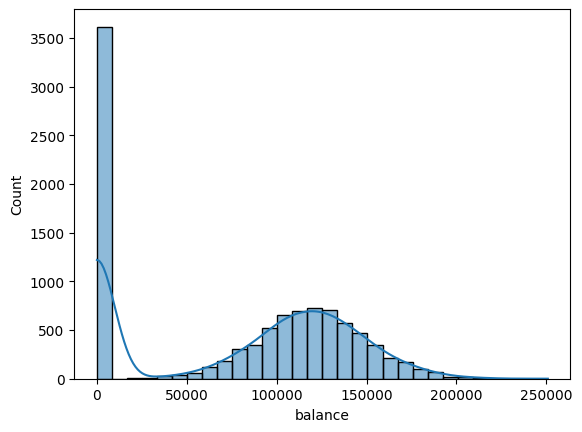

In [247]:
sns.histplot(data=bank_account_df,x='balance',bins=30,kde=True)

In [248]:
no_saving_customer_df = bank_account_df[bank_account_df['balance']==0]
saving_customer_df = bank_account_df[bank_account_df['balance']>0]

In [249]:
pd.crosstab(bank_account_df['hascrcard'],bank_account_df['exited'],rownames=['Has Credit Card'],colnames=['Churn Status'])

Churn Status,0,1
Has Credit Card,,
0,3546,1302
1,4414,735


In [250]:
no_saving_customer_df.describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,3616.0,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000
mean,0.0,1.784845,0.517699,5.072179,0.517699,0.138274,649.483684,38.436670,98988.773327
std,0.0,0.496352,0.499756,2.860721,0.499756,0.345235,96.154226,10.492907,57737.961619
min,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,350.000000,18.000000,90.070000
25%,0.0,1.750000,0.000000,3.000000,0.000000,0.000000,583.000000,31.000000,49495.975000
50%,0.0,2.000000,1.000000,5.000000,1.000000,0.000000,651.000000,37.000000,98619.915000
75%,0.0,2.000000,1.000000,7.000000,1.000000,0.000000,717.000000,43.000000,148370.202500
max,0.0,4.000000,1.000000,10.000000,1.000000,1.000000,850.000000,88.000000,199992.480000


In [251]:
pd.crosstab(no_saving_customer_df['hascrcard'],bank_account_df['exited'],rownames=['Has Credit Card'],colnames=['Churn Status'])

Churn Status,0,1
Has Credit Card,,
0,1424,320
1,1692,180


In [252]:
potential_customers = no_saving_customer_df[(no_saving_customer_df['creditscore']>=700) &
                      (no_saving_customer_df['estimatedsalary'] >= 100000) &
                      (no_saving_customer_df['exited'] == 0)
                     ]

In [253]:
potential_customers.describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,480.0,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.000000
mean,0.0,1.864583,0.545833,5.154167,0.545833,0.0,758.675000,37.010417,149730.417167
std,0.0,0.371753,0.498414,2.825692,0.498414,0.0,44.677908,10.027202,28384.669531
min,0.0,1.000000,0.000000,0.000000,0.000000,0.0,700.000000,19.000000,100101.060000
25%,0.0,2.000000,0.000000,3.000000,0.000000,0.0,722.000000,30.000000,124458.567500
50%,0.0,2.000000,1.000000,5.000000,1.000000,0.0,748.000000,36.000000,149182.200000
75%,0.0,2.000000,1.000000,8.000000,1.000000,0.0,791.250000,41.000000,174432.127500
max,0.0,3.000000,1.000000,10.000000,1.000000,0.0,850.000000,85.000000,199775.670000


In [254]:
potential_customers['age_group'].value_counts()

age_group
33-44       230
24-32       154
45-60        58
above 60     20
21-23        11
18-20         7
Name: count, dtype: int64

Among no saving customers, there are over 10% of potential customers around 480 who have high credit score,high income by offering saving plan and there are also 50% of potential customers don't have credit card. By providing credit card, increase engagement and saving. Their age segments are 24-60 similar to overall customer age segment. it is better if we get customers demographic and jobs like self employed or staff and their company. we can provide more valuable and specific customer segment to marketing team. Our potential customers exists in france and spain for offering localized program.

In [255]:
potential_customers['geography'].value_counts()

geography
france    333
spain     147
Name: count, dtype: Int64

In [256]:
potential_customers['gender'].value_counts()

gender
male      265
female    215
Name: count, dtype: Int64

In [257]:
strong_engagement_customers = bank_account_df[(bank_account_df['creditscore'] >= 700)
                                               & (bank_account_df['balance'] >= 100000)
                                               & (bank_account_df['estimatedsalary'] >= 100000)
                                               & (bank_account_df['exited'] == 0)
                                               & (bank_account_df['isactivemember'] == 1)
                                               ]
strong_engagement_customers.describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,341.000000,341.000000,341.0,341.000000,341.0,341.0,341.000000,341.000000,341.000000
mean,133306.528886,1.372434,1.0,4.868035,1.0,0.0,763.290323,38.457478,149923.115748
std,21947.339097,0.490201,0.0,2.968988,0.0,0.0,43.960017,11.621055,29257.916676
min,100476.460000,1.000000,1.0,0.000000,1.0,0.0,700.000000,18.000000,100127.710000
25%,117265.210000,1.000000,1.0,2.000000,1.0,0.0,726.000000,31.000000,125782.290000
50%,129164.880000,1.000000,1.0,5.000000,1.0,0.0,756.000000,37.000000,148977.720000
75%,146652.010000,2.000000,1.0,7.000000,1.0,0.0,795.000000,42.000000,175398.340000
max,191523.090000,3.000000,1.0,10.000000,1.0,0.0,850.000000,92.000000,199841.320000


In [258]:
pd.crosstab(strong_engagement_customers['geography'],strong_engagement_customers['gender'])

gender,female,male
geography,,
france,57,93
germany,43,69
spain,35,44


In [259]:
pd.crosstab(strong_engagement_customers['age_group'],strong_engagement_customers['geography'])

geography,france,germany,spain
age_group,,,
18-20,2,2,1
21-23,6,2,3
24-32,38,34,19
33-44,74,58,40
45-60,15,11,11
above 60,15,5,5


In [260]:
bank_account_df['gender'].value_counts()

gender
male      5456
female    4541
Name: count, dtype: Int64

In [261]:
revenue_lost_customers = bank_account_df[(bank_account_df['creditscore'] >= 700)
                                               & (bank_account_df['balance'] >= 100000)
                                               & (bank_account_df['estimatedsalary'] >= 100000)
                                               & (bank_account_df['exited'] == 1)
                                               & (bank_account_df['isactivemember'] == 1)
                                               ]
revenue_lost_customers.describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,65.000000,65.000000,65.0,65.000000,65.0,65.0,65.000000,65.000000,65.000000
mean,130761.184308,1.630769,1.0,5.323077,1.0,1.0,758.800000,44.338462,148781.910000
std,22617.229949,0.911202,0.0,3.182509,0.0,0.0,41.065953,10.127742,27787.042654
min,102703.620000,1.000000,1.0,0.000000,1.0,1.0,700.000000,26.000000,100720.020000
25%,113709.280000,1.000000,1.0,2.000000,1.0,1.0,727.000000,36.000000,128521.160000
50%,124954.940000,1.000000,1.0,6.000000,1.0,1.0,749.000000,45.000000,148412.240000
75%,141252.180000,2.000000,1.0,8.000000,1.0,1.0,779.000000,50.000000,170454.930000
max,209490.210000,4.000000,1.0,10.000000,1.0,1.0,850.000000,69.000000,199693.840000


In [262]:
pd.crosstab(revenue_lost_customers['geography'],revenue_lost_customers['gender'])

gender,female,male
geography,,
france,7,6
germany,19,25
spain,7,1


In [263]:
pd.crosstab(revenue_lost_customers['age_group'],revenue_lost_customers['geography'])

geography,france,germany,spain
age_group,,,
24-32,3,4,1
33-44,4,17,2
45-60,5,21,4
above 60,1,2,1


In [264]:
len(strong_engagement_customers)/len(bank_account_df)

0.034110233069920975

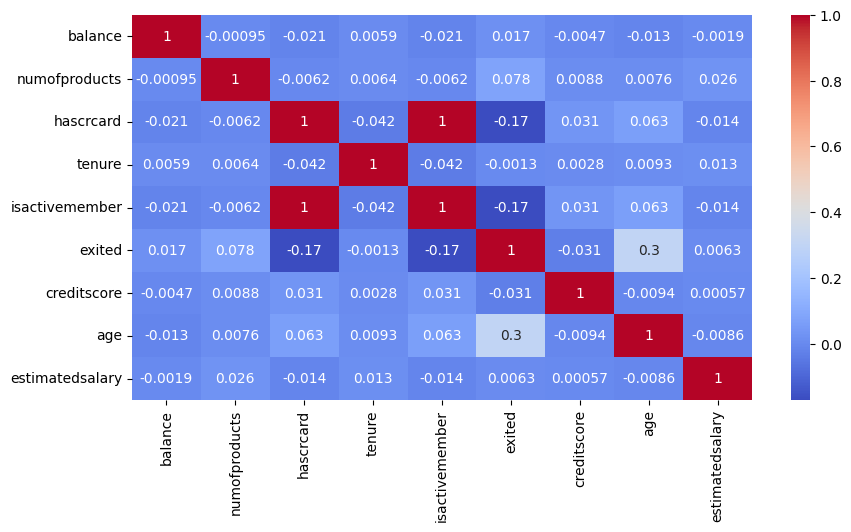

In [265]:
numerical_columns = saving_customer_df.select_dtypes(include=np.number).columns
saving_customer_corr = saving_customer_df[numerical_columns].corr()
plt.figure(figsize=(10,5))
sns.heatmap(saving_customer_corr,annot=True,cmap='coolwarm')
plt.show()

In [266]:
pd.crosstab(saving_customer_df['age_group'],saving_customer_df['exited'],rownames=['Age Group'],colnames=['Churn'],normalize='index')*100

Churn,0,1
Age Group,,
18-20,94.339623,5.660377
21-23,88.965517,11.034483
24-32,90.604468,9.395532
33-44,80.829016,19.170984
45-60,45.768025,54.231975
above 60,69.360269,30.639731


In [267]:
saving_customer_df.groupby('exited').describe().T.style.set_sticky()

In [268]:
bank_account_df.groupby('exited').describe().T.style.set_sticky()

In [269]:
1/44

0.022727272727272728

In [270]:
2/651

0.0030721966205837174

In [271]:
products_churn_group = bank_account_df[bank_account_df['exited']==1]['numofproducts']
products_non_churn_group = bank_account_df[bank_account_df['exited']==0]['numofproducts']

In [272]:
from scipy.stats import mannwhitneyu
print(mannwhitneyu(products_churn_group,products_non_churn_group,alternative='two-sided'))

MannwhitneyuResult(statistic=np.float64(6826628.0), pvalue=np.float64(4.4636029186050926e-36))


## **Add to Streamlit**

**Number of Products have significant difference between churner and non-churners. According to statstic sign, churn group customers hold more products. Customers who hold more than 2 products, they are more likely to churn.**

<Axes: xlabel='exited', ylabel='numofproducts'>

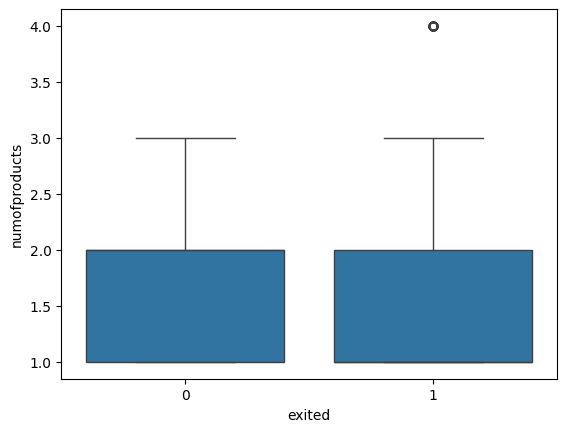

In [273]:
sns.boxplot(bank_account_df,x='exited',y='numofproducts')

<Axes: xlabel='numofproducts', ylabel='Count'>

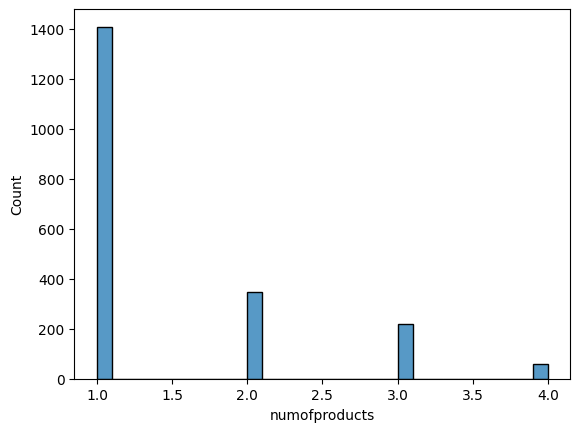

In [274]:
sns.histplot(products_churn_group,bins=30)

<Axes: xlabel='numofproducts', ylabel='Count'>

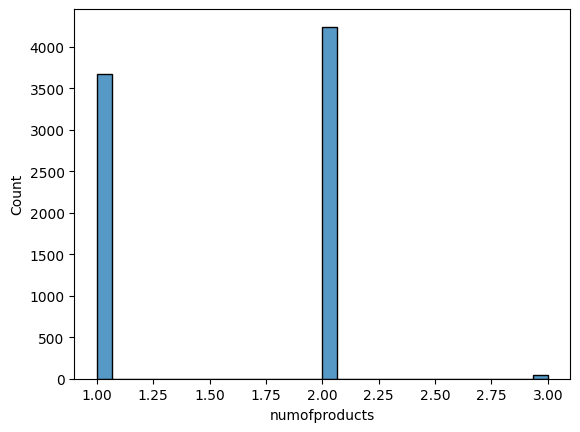

In [275]:
sns.histplot(products_non_churn_group,bins=30)

In [276]:
pd.crosstab(bank_account_df['numofproducts'],bank_account_df['exited'],normalize='index')

exited,0,1
numofproducts,,
1,0.722692,0.277308
2,0.924183,0.075817
3,0.172932,0.827068
4,0.000000,1.000000


In [277]:
creditscore_churn_group = bank_account_df[bank_account_df['exited']==1]['creditscore']
creditscore_non_churn_group = bank_account_df[bank_account_df['exited']==0]['creditscore']

<Axes: xlabel='creditscore', ylabel='Count'>

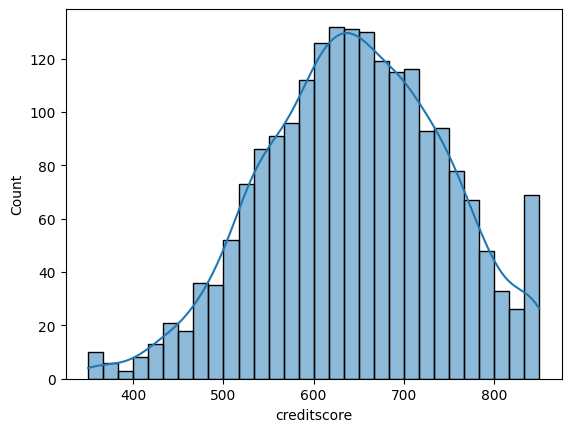

In [278]:
sns.histplot(creditscore_churn_group,bins=30,kde=True)

<Axes: xlabel='creditscore', ylabel='Count'>

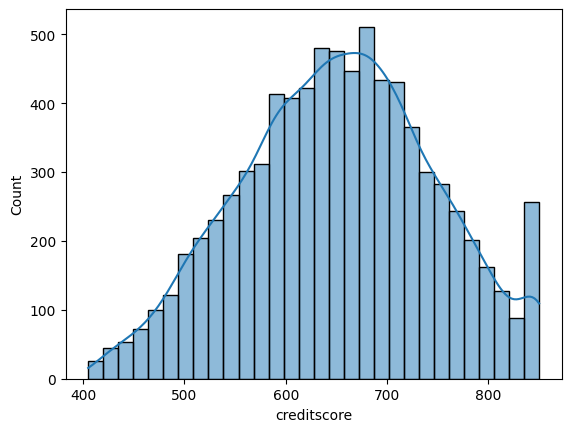

In [279]:
sns.histplot(creditscore_non_churn_group,bins=30,kde=True)

In [280]:
from scipy.stats import levene
print(levene(creditscore_churn_group,creditscore_non_churn_group))

LeveneResult(statistic=np.float64(5.509894925242024), pvalue=np.float64(0.018928585311909843))


In [281]:
from scipy.stats import ttest_ind
ttest_ind(creditscore_churn_group,creditscore_non_churn_group,equal_var=False)

TtestResult(statistic=np.float64(-2.6431713142700652), pvalue=np.float64(0.0082553481599834), df=np.float64(3051.39873579452))

<Axes: xlabel='exited', ylabel='creditscore'>

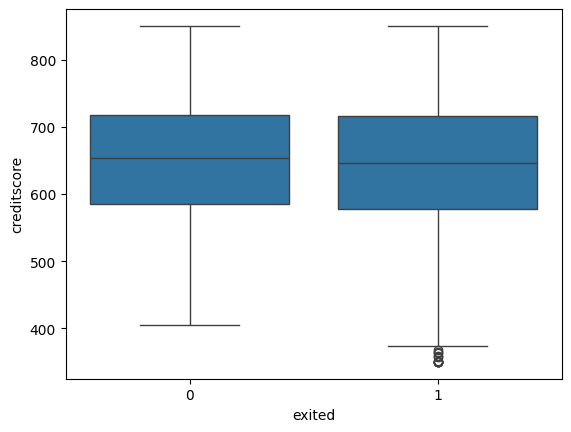

In [282]:
sns.boxplot(bank_account_df,x='exited',y='creditscore')

# **Streamlit To add**
According to Ttest result, lower credit score customers are more likely to churn.We need to explore why lower credit score customers are higher churn.

In [283]:
age_churn_group = bank_account_df[bank_account_df['exited']==1]['age']
age_non_churn_group = bank_account_df[bank_account_df['exited']==0]['age']

<Axes: xlabel='age', ylabel='Count'>

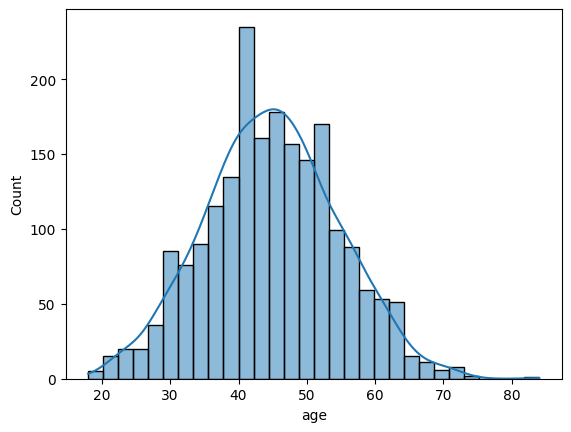

In [284]:
sns.histplot(age_churn_group,bins=30,kde=True)

<Axes: xlabel='age', ylabel='Count'>

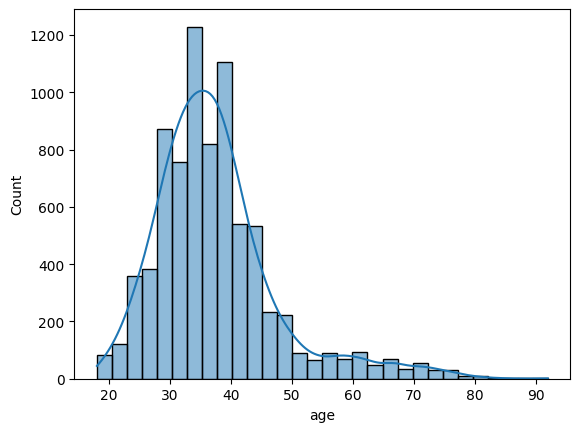

In [285]:
sns.histplot(age_non_churn_group,bins=30,kde=True)

In [286]:
levene(age_churn_group,age_non_churn_group)

LeveneResult(statistic=np.float64(12.993575861412747), pvalue=np.float64(0.00031408224628594095))

In [287]:
ttest_ind(age_churn_group,age_non_churn_group,equal_var=False,alternative='two-sided')

TtestResult(statistic=np.float64(30.417889044303532), pvalue=np.float64(4.80213021198845e-179), df=np.float64(3248.894728555323))

# **Streamlit to Add**

Old customers are morelikely to churn than younger customers. So retention plan need to focus on young customer. Marketing team should focus on digital campaign or socail media active to increase retention rate while take care of old customer to reduce churn rate by providing incentive plan or loyalty program.

Saving amount and income of  churners are slightly higher than non churners. In credit score, churner is lower than non churners. Age 40 to 60 customers are more likely to leave our bank. So marketing team should provided offer plan  related with credit card and restrict loan plan to potential customers for 40 to 60 aged customers. Customer duration is not relevant with churn.

In [288]:
saving_churn_customer_df =saving_customer_df[saving_customer_df['exited']==1]
saving_non_churn_customer_df = saving_customer_df[saving_customer_df['exited']==0]

<Axes: xlabel='balance', ylabel='Count'>

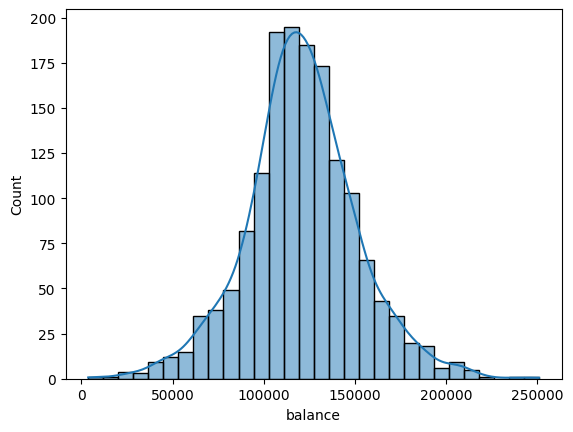

In [289]:
sns.histplot(saving_churn_customer_df,x='balance',bins=30,kde=True)

<Axes: xlabel='balance', ylabel='Count'>

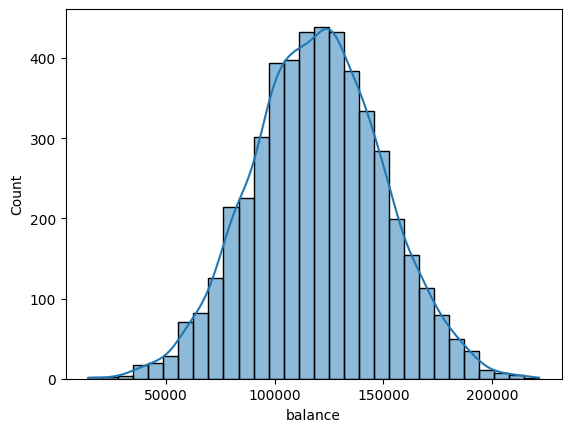

In [290]:
sns.histplot(saving_non_churn_customer_df,x='balance',bins=30,kde=True)

In [291]:
saving_churn_group = saving_churn_customer_df['balance']
saving_non_churn_group = saving_non_churn_customer_df['balance']
levene_stat,p_val = levene(saving_churn_group,saving_non_churn_group)
print(levene_stat,p_val)

2.945753863336243 0.08615206557576904


In [292]:
ttest_stat,p_val = ttest_ind(saving_churn_group,saving_non_churn_group)
print(ttest_stat,p_val)

1.3798197713690539 0.16769050368669355


According to T Test result, saving doesn't impact on churn.

In [293]:
income_churn_group = bank_account_df[bank_account_df['exited']==1]['estimatedsalary']
income_non_churn_group = bank_account_df[bank_account_df['exited']==0]['estimatedsalary']

<Axes: xlabel='estimatedsalary', ylabel='Count'>

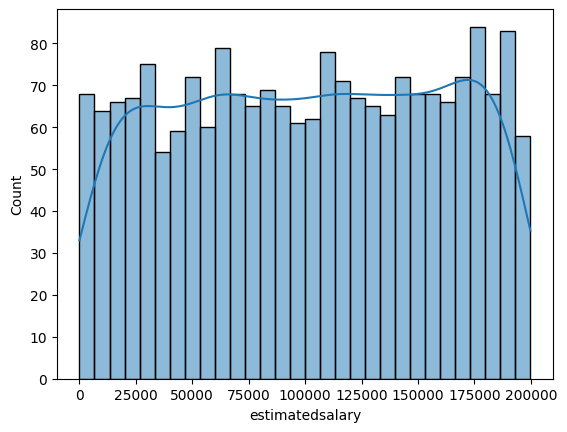

In [294]:
sns.histplot(income_churn_group,bins=30,kde=True)

<Axes: xlabel='estimatedsalary', ylabel='Count'>

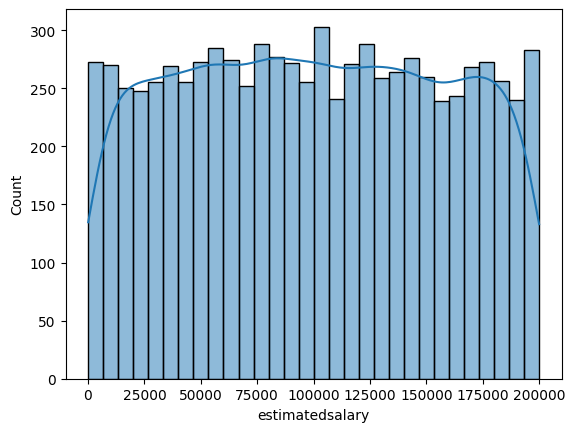

In [295]:
sns.histplot(income_non_churn_group,bins=30,kde=True)

In [296]:
mannwhitneyu_stats,p_val = mannwhitneyu(income_churn_group,income_non_churn_group,alternative='two-sided')
print(mannwhitneyu_stats,p_val)

8247444.0 0.22778365666167566


According to Man Whitneyu test result, there is no significant difference between churnner and non churner of income.

In [297]:
bank_account_df['saving'] = bank_account_df['balance'].apply(lambda x:1 if x>0 else 0)

In [298]:
bank_account_df.columns

Index(['customerid', 'balance', 'numofproducts', 'hascrcard', 'tenure',
       'isactivemember', 'exited', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'estimatedsalary', 'estimatedsalary_group',
       'age_group', 'saving'],
      dtype='object')

<Axes: xlabel='balance', ylabel='Count'>

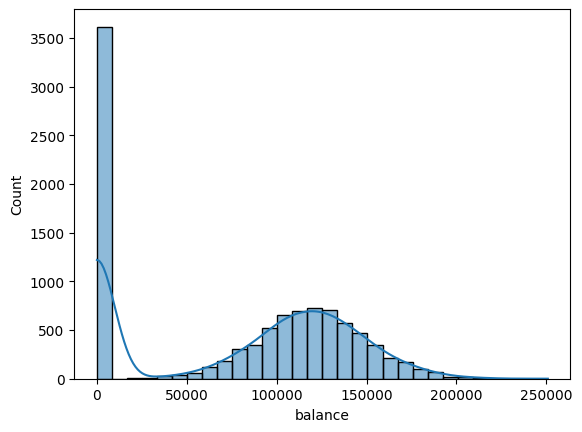

In [299]:
sns.histplot(bank_account_df['balance'],bins=30,kde=True)

In [300]:
bank_account_df['saving_group'] = pd.cut(bank_account_df['balance'],bins=[-1,0,50000,100000,150000,200000,300000],labels=['no saving','below 50k','50k-100k','100k - 150k','150k - 200k','above 200k'])
bank_account_df['saving_group'].value_counts()

saving_group
100k - 150k    3828
no saving      3616
50k-100k       1509
150k - 200k     935
below 50k        75
above 200k       34
Name: count, dtype: int64

<Axes: xlabel='creditscore', ylabel='Count'>

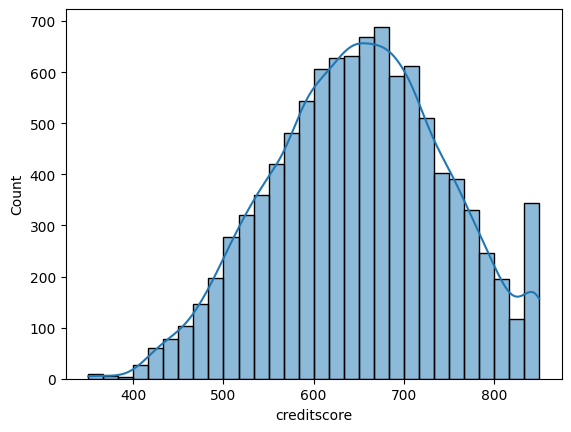

In [301]:
sns.histplot(bank_account_df['creditscore'],bins=30,kde=True)

In [302]:
bank_account_df['creditscore_group'] = pd.cut(bank_account_df['creditscore'],bins=[0,650,700,850],labels=['below 650','650-700','above 700'])

In [303]:
bank_account_df['creditscore_group'].value_counts()

creditscore_group
below 650    4935
above 700    3116
650-700      1946
Name: count, dtype: int64

In [304]:
bank_account_df.columns

Index(['customerid', 'balance', 'numofproducts', 'hascrcard', 'tenure',
       'isactivemember', 'exited', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'estimatedsalary', 'estimatedsalary_group',
       'age_group', 'saving', 'saving_group', 'creditscore_group'],
      dtype='object')

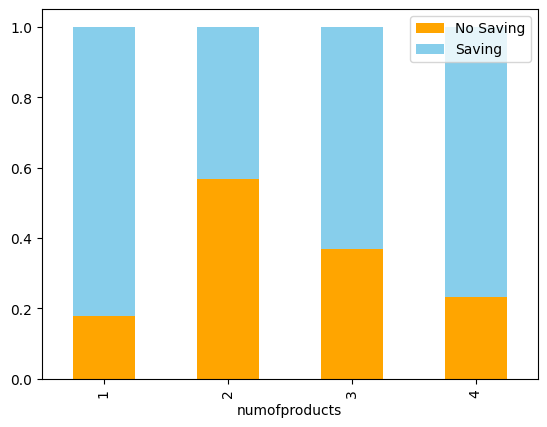

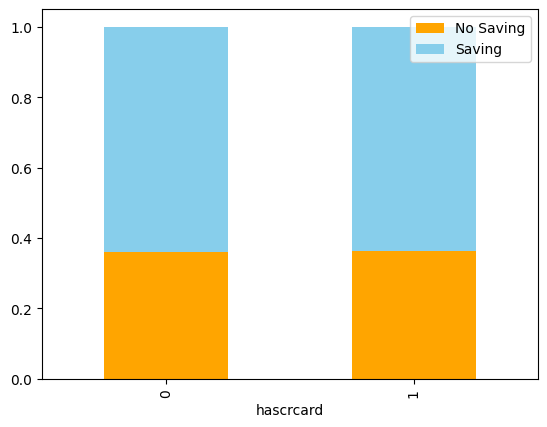

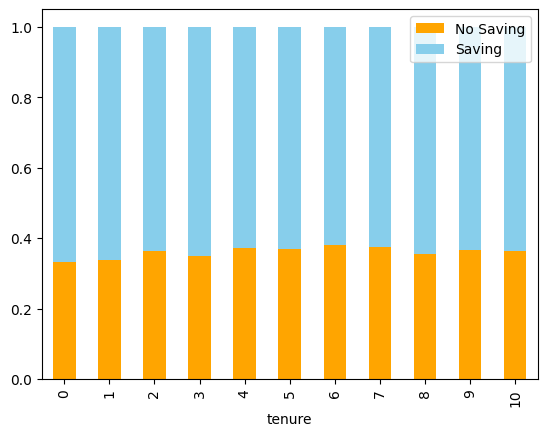

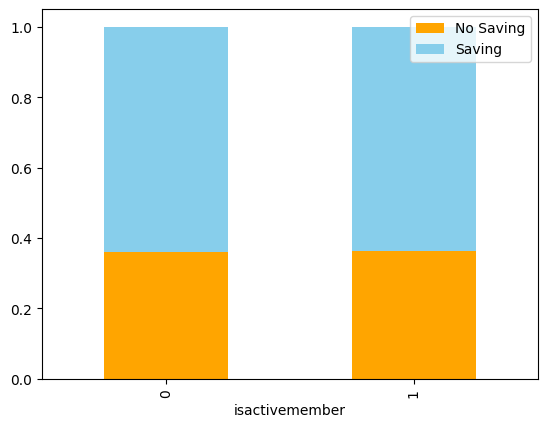

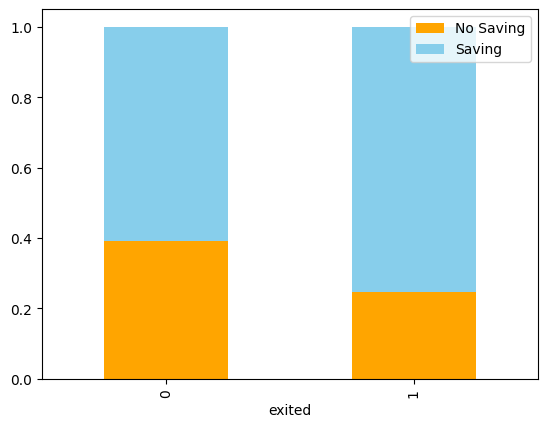

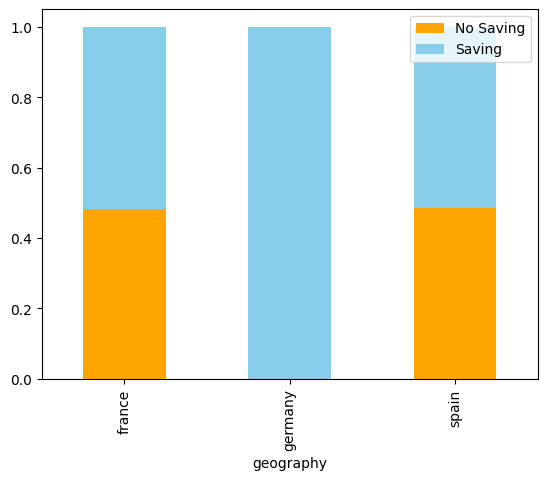

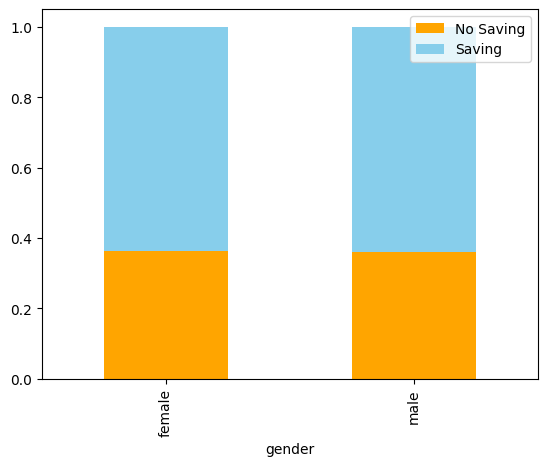

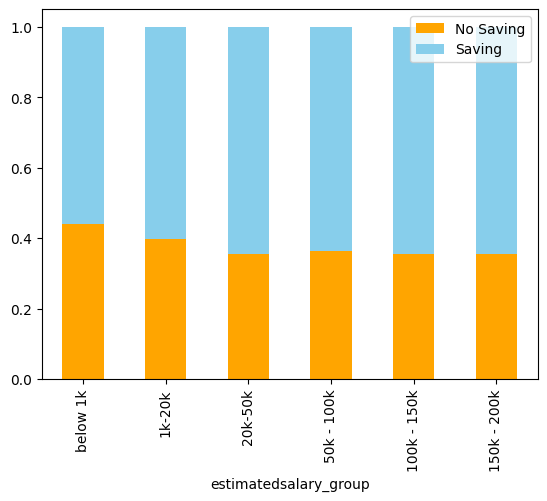

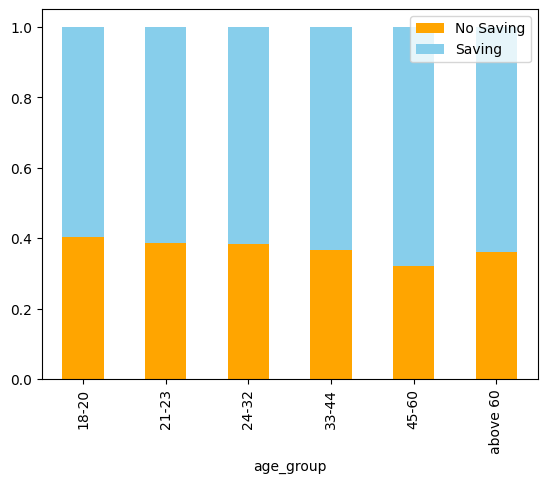

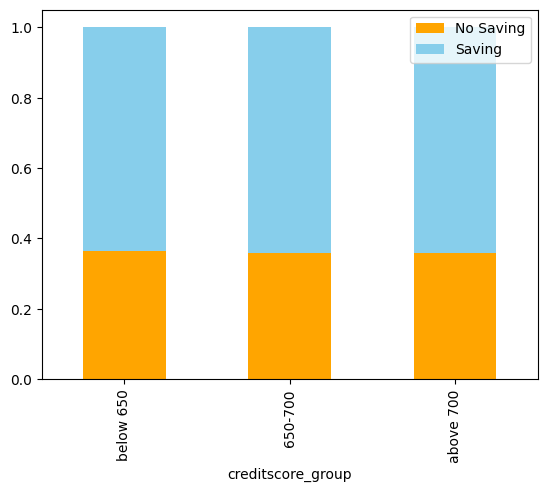

In [305]:
saving_categorical_columns = ['numofproducts', 'hascrcard', 'tenure', 'isactivemember',
       'exited', 'geography', 'gender','estimatedsalary_group', 'age_group','creditscore_group']
for col in saving_categorical_columns:
    ct = pd.crosstab(bank_account_df[col],bank_account_df['saving'],normalize='index')
    ct.plot(kind='bar',stacked=True,color=['orange','skyblue'])
    plt.legend(loc='upper right',labels=['No Saving','Saving'])
    plt.show()

Around 38 percent of france and spain customers are no saving customers and all germany customers are saving customers. 

In [306]:
pd.crosstab(no_saving_customer_df['geography'],no_saving_customer_df['gender'],rownames=['Geography'],colnames=['Gender'])

Gender,female,male
Geography,,
france,1108,1309
spain,545,654


In [307]:
saving_customer_df.groupby('geography').describe().T.style.set_sticky()

Germany customers have higher churn rate than other countries. They have higher salary, saving than another countries customers. We need to run regression test for evaluating which factors more influence on churn rate.

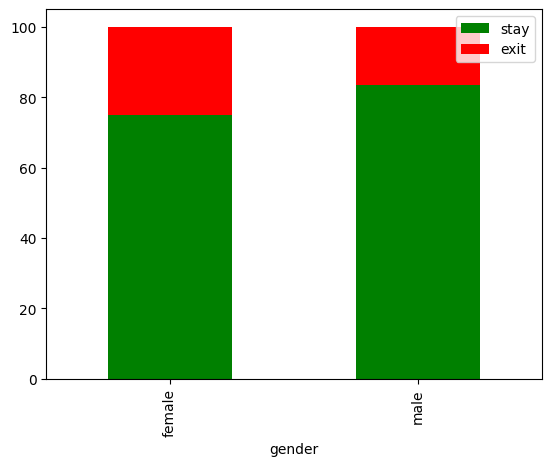

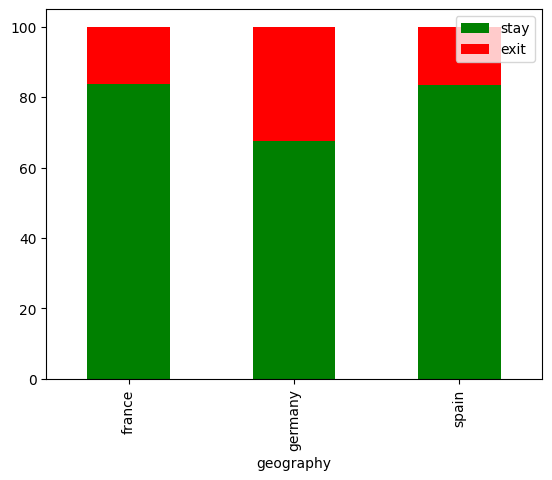

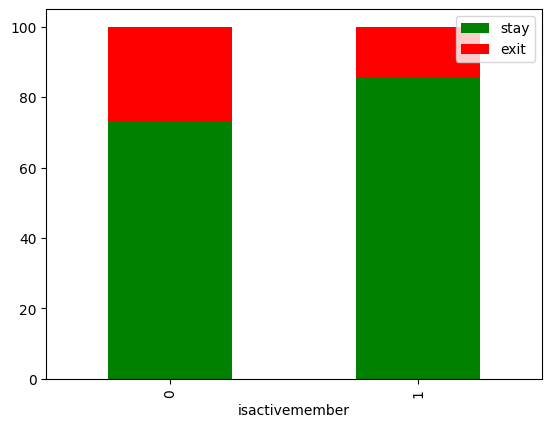

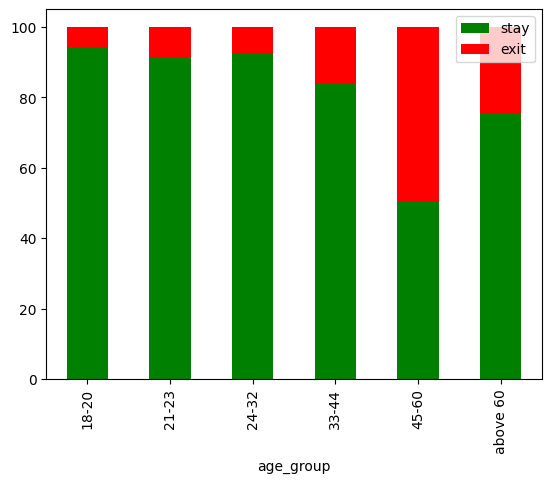

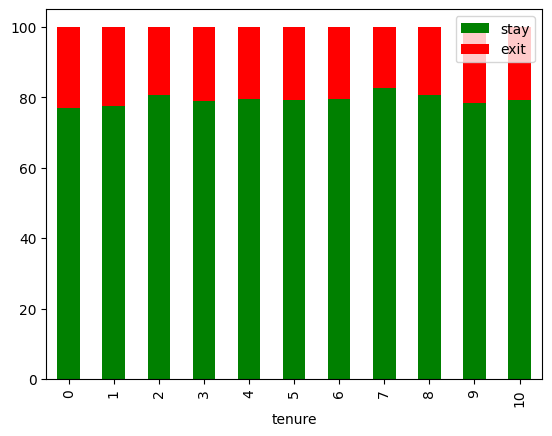

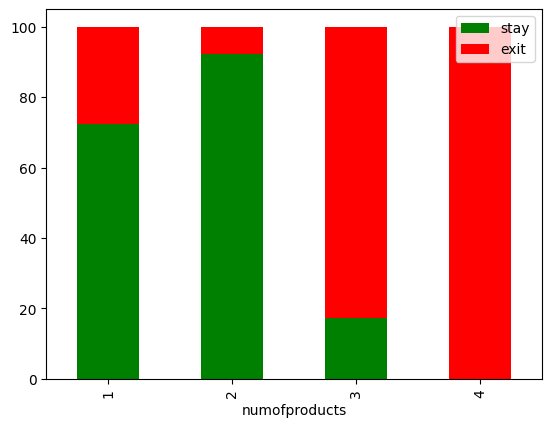

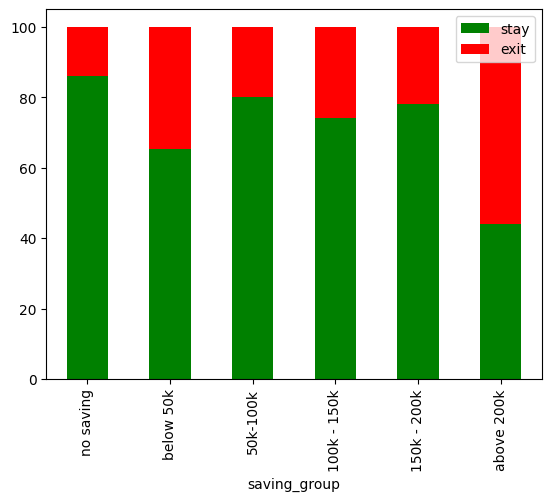

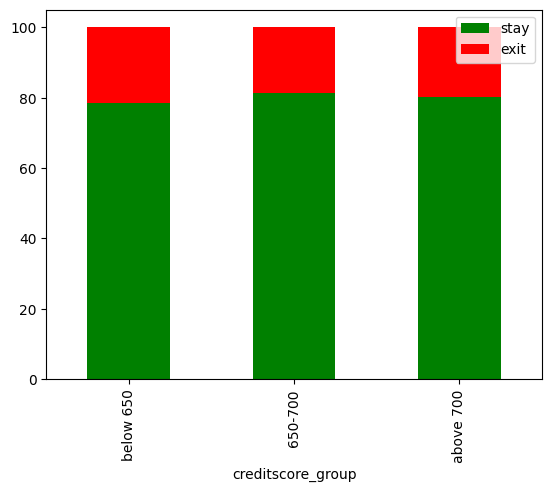

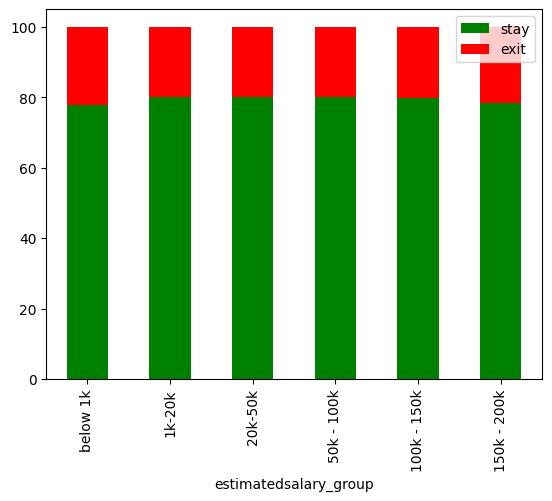

In [308]:
churn_categorical_columns = ['gender','geography','isactivemember','age_group','tenure','numofproducts','saving_group','creditscore_group','estimatedsalary_group']

for col in churn_categorical_columns:
    ct = pd.crosstab(bank_account_df[col],bank_account_df['exited'],normalize='index') *100
    ct.plot(kind='bar',stacked=True,color=['green','red'])
    plt.legend(loc='upper right',labels=['stay','exit'])
    plt.show()

In [309]:
contingency_table = {}

for col in churn_categorical_columns:
    contingency_table[col] = pd.crosstab(bank_account_df[col],bank_account_df['exited'])
    display(contingency_table[col])

exited,0,1
gender,,
female,3402,1139
male,4558,898


exited,0,1
geography,,
france,4203,810
germany,1694,814
spain,2063,413


exited,0,1
isactivemember,,
0,3546,1302
1,4414,735


exited,0,1
age_group,,
18-20,84,5
21-23,215,21
24-32,2277,187
33-44,4088,780
45-60,947,929
above 60,349,115


exited,0,1
tenure,,
0,318,95
1,803,232
2,846,201
3,795,213
4,786,203
5,803,209
6,770,196
7,851,177
8,828,197


exited,0,1
numofproducts,,
1,3672,1409
2,4242,348
3,46,220
4,0,60


exited,0,1
saving_group,,
no saving,3116,500
below 50k,49,26
50k-100k,1209,300
100k - 150k,2841,987
150k - 200k,730,205
above 200k,15,19


exited,0,1
creditscore_group,,
below 650,3878,1057
650-700,1585,361
above 700,2497,619


exited,0,1
estimatedsalary_group,,
below 1k,46,13
1k-20k,742,185
20k-50k,1176,291
50k - 100k,2032,504
100k - 150k,2036,517
150k - 200k,1928,527


In [310]:
from scipy.stats import chi2_contingency

chi2_results = []
for col in churn_categorical_columns:
    chi2_stats,chi2_p_val,dof,expected = chi2_contingency(contingency_table[col])
    chi2_results.append({'variable':col,'p_val':chi2_p_val,'stats':chi2_stats})
chi2_results = pd.DataFrame(chi2_results).sort_values(by='p_val')
chi2_results

,variable,p_val,stats
5,numofproducts,0.000000e+00,1503.947288
3,age_group,4.086384e-284,1323.973914
1,geography,3.559626e-66,301.401921
2,isactivemember,9.360390e-55,242.859170
6,saving_group,1.036622e-41,202.046349
0,gender,2.085494e-26,113.067532
7,creditscore_group,2.022243e-02,7.801925
4,tenure,1.782949e-01,13.885154
8,estimatedsalary_group,7.489295e-01,2.681611


According to statistical test and visual analysis, geography variable(germany) is most influene in churn rate.Inactive customers are more likely to exit than active customers. We need to take care of providing credit plan to improve engagement and reduce churn. Female are more likely to exit than male. Next, we continue to implement logistic regression for more accurate recommendation.

In [311]:
from sklearn.preprocessing import MinMaxScaler

In [312]:
scaler = MinMaxScaler()

In [313]:
scale_columns = ['numofproducts','creditscore','age']

In [314]:
for col in scale_columns:
    bank_account_df[col+'_scale'] = scaler.fit_transform(bank_account_df[[col]])

In [315]:
bank_account_df['numofproducts_scale'].unique()

array([0.        , 0.66666667, 0.33333333, 1.        ])

In [316]:
bank_account_df['gender_scale'] = bank_account_df['gender'].map({'male':0,'female':1}).astype(int)

In [317]:
geography_dummies = pd.get_dummies(bank_account_df['geography'],prefix='geography',drop_first=True)
age_group_dummies = pd.get_dummies(bank_account_df['age_group'],prefix='age_group',drop_first=True)
numofproducts_dummies = pd.get_dummies(bank_account_df['numofproducts'],prefix='numofproducts',drop_first=True)
saving_group_dummies = pd.get_dummies(bank_account_df['saving_group'],prefix='saving_group',drop_first=True)
creditscore_group_dummies = pd.get_dummies(bank_account_df['creditscore_group'],prefix='creditscore_group',drop_first=True)

In [318]:
bank_account_df = pd.concat([bank_account_df,geography_dummies,age_group_dummies,numofproducts_dummies,saving_group_dummies,creditscore_group_dummies],axis=1)

In [319]:
bank_account_df.dtypes

customerid                     string[python]
balance                               float64
numofproducts                           int64
hascrcard                               int64
tenure                                  int64
isactivemember                          int64
exited                                  int64
surname                                object
creditscore                             int64
geography                      string[python]
gender                         string[python]
age                                     int64
estimatedsalary                       float64
estimatedsalary_group                category
age_group                            category
saving                                  int64
saving_group                         category
creditscore_group                    category
numofproducts_scale                   float64
creditscore_scale                     float64
age_scale                             float64
gender_scale                      

In [320]:
bank_account_df[geography_dummies.columns] = bank_account_df[geography_dummies.columns].astype(int)
bank_account_df[age_group_dummies.columns] = bank_account_df[age_group_dummies.columns].astype(int)
bank_account_df[numofproducts_dummies.columns] = bank_account_df[numofproducts_dummies.columns].astype(int)
bank_account_df[saving_group_dummies.columns] = bank_account_df[saving_group_dummies.columns].astype(int)
bank_account_df[creditscore_group_dummies.columns] = bank_account_df[creditscore_group_dummies.columns].astype(int)

In [321]:
bank_account_df['exited'].value_counts()

exited
0    7960
1    2037
Name: count, dtype: int64

In [322]:
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV

In [323]:
from sklearn.linear_model import LogisticRegression

In [324]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,precision_recall_curve

In [325]:
bank_account_df['creditscore_group'].unique()

['below 650', '650-700', 'above 700']
Categories (3, object): ['below 650' < '650-700' < 'above 700']

In [326]:
bank_account_df.columns

Index(['customerid', 'balance', 'numofproducts', 'hascrcard', 'tenure',
       'isactivemember', 'exited', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'estimatedsalary', 'estimatedsalary_group',
       'age_group', 'saving', 'saving_group', 'creditscore_group',
       'numofproducts_scale', 'creditscore_scale', 'age_scale', 'gender_scale',
       'geography_germany', 'geography_spain', 'age_group_21-23',
       'age_group_24-32', 'age_group_33-44', 'age_group_45-60',
       'age_group_above 60', 'numofproducts_2', 'numofproducts_3',
       'numofproducts_4', 'saving_group_below 50k', 'saving_group_50k-100k',
       'saving_group_100k - 150k', 'saving_group_150k - 200k',
       'saving_group_above 200k', 'creditscore_group_650-700',
       'creditscore_group_above 700'],
      dtype='object')

In [327]:
X = bank_account_df[[
    #'numofproducts_scale'
    'numofproducts_2'
    ,'numofproducts_3'
    ,'numofproducts_4'
    #,'creditscore_scale'
    ,'creditscore_group_650-700'
    ,'creditscore_group_above 700'
    ,'age_group_21-23'
    ,'age_group_24-32' 
    ,'age_group_33-44'
    ,'age_group_45-60' 
    ,'age_group_above 60'
    ,'gender_scale'
    ,'geography_germany'
    ,'geography_spain'
    #,'tenure_scale'
    #,'saving'
    , 'saving_group_50k-100k'
    , 'saving_group_150k - 200k'
    , 'saving_group_100k - 150k'
    , 'saving_group_below 50k'
    , 'saving_group_above 200k'
   # ,'isactivemember'
    ,'hascrcard']]

In [328]:
Y = bank_account_df['exited']

In [329]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [330]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

y_true_all = []
y_proba_exit_all = []
y_proba_stay_all = []
test_index_all = []
y_pred_all = []

In [331]:
bank_account_df.saving_group.unique()

['no saving', '50k-100k', '150k - 200k', '100k - 150k', 'below 50k', 'above 200k']
Categories (6, object): ['no saving' < 'below 50k' < '50k-100k' < '100k - 150k' < '150k - 200k' < 'above 200k']

In [332]:
model = LogisticRegression(class_weight='balanced',random_state=42)
for train_index,test_index in kf.split(X,Y):
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    Y_train,Y_test = Y.iloc[train_index],Y.iloc[test_index]
    model.fit(X_train,Y_train)
    Y_proba = model.predict_proba(X_test)[:,1]
    Y_proba_stay = model.predict_proba(X_test)[:,0]
    Y_pred = (Y_proba >= 0.63).astype(int)
    #Y_pred = model.predict(X_test)


    y_true_all.extend(Y_test)
    y_proba_exit_all.extend(Y_proba)
    y_proba_stay_all.extend(Y_proba_stay)
    test_index_all.extend(test_index)
    y_pred_all.extend(Y_pred)

    accuracy_list.append(accuracy_score(Y_test,Y_pred))
    precision_list.append(precision_score(Y_test,Y_pred))
    recall_list.append(recall_score(Y_test,Y_pred))
    f1_list.append(f1_score(Y_test,Y_pred))


print(f'Avg accuracy:{np.mean(accuracy_list)}')
print(f'Avg precision:{np.mean(precision_list)}')
print(f'Avg Recall: {np.mean(recall_list)}')
print(f'Avg F1 Score:{np.mean(f1_list)}')

Avg accuracy:0.8271494247123561
Avg precision:0.5686677532536819
Avg Recall: 0.6269246519246519
Avg F1 Score:0.5961920460808079


Logistic Final

Avg accuracy:0.8270489244622311
Avg precision:0.5680435488996322
Avg Recall: 0.6308486293780412
Avg F1 Score:0.5976804111003673

#Random Forest result

Avg accuracy:0.8112431715857928
Avg precision:0.5406971833669836
Avg recall:0.4914077178783061
Avg f1:0.5145720512585579

Avg accuracy:0.8083425212606302
Avg precision:0.5323874340657924
Avg recall:0.4904321433733198
Avg f1:0.5103840601968563


Avg accuracy:0.8204464732366183
Avg precision:0.5597865871301595
Avg recall:0.5567085802379921
Avg f1:0.5580608148557429

Avg accuracy:0.799941220610305
Avg precision:0.5066134076152969
Avg recall:0.7015127426892133
Avg f1:0.5880647150649991

In [333]:
predicted_df = pd.DataFrame({
    'index':test_index_all,
    'stay_proba':y_proba_stay_all,
    'exit_proba':y_proba_exit_all,
    'predicted':y_pred_all
})
predicted_df.sort_values('index').reset_index()
bank_account_df = bank_account_df.reset_index(drop=True)
bank_account_df['stay_proba'] = np.nan
bank_account_df['exit_proba'] = np.nan
bank_account_df['predicted'] = np.nan
bank_account_df.loc[predicted_df['index'],'stay_proba'] = predicted_df['stay_proba'].values
bank_account_df.loc[predicted_df['index'],'exit_proba'] = predicted_df['exit_proba'].values
bank_account_df.loc[predicted_df['index'],'predicted'] = predicted_df['predicted'].values

In [334]:
assert np.allclose(bank_account_df.loc[predicted_df['index'],'stay_proba']+bank_account_df.loc[predicted_df['index'],'exit_proba'],1)

In [335]:
bank_account_df['exited'].value_counts()

exited
0    7960
1    2037
Name: count, dtype: int64

In [336]:
precision,recall,thresholds = precision_recall_curve(y_true_all,y_proba_exit_all)

In [337]:
precision,recall,thresholds

(array([0.20376113, 0.20378151, 0.20370185, ..., 1.        , 1.        ,
        1.        ], shape=(3642,)),
 array([1.00000000e+00, 1.00000000e+00, 9.99509082e-01, ...,
        9.81836033e-04, 4.90918017e-04, 0.00000000e+00], shape=(3642,)),
 array([0.0253122 , 0.02611541, 0.02813518, ..., 0.99787206, 0.997985  ,
        0.99828967], shape=(3641,)))

In [338]:
precision = precision[:-1]
recall = recall[1:]

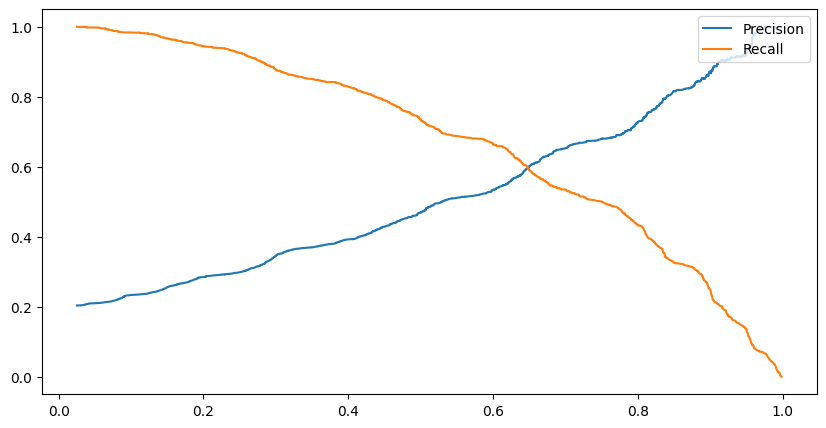

In [339]:
plt.figure(figsize=(10,5))
plt.plot(thresholds,precision,label='Precision')
plt.plot(thresholds,recall,label='Recall')
plt.legend(loc='upper right')
plt.show()

In [340]:
thresholds_f1_score = 2 *(precision*recall)/(precision+recall)
best_threshold = thresholds[np.argmax(thresholds_f1_score)]
best_threshold

np.float64(0.6454195299718956)

In [341]:
logistic_features = pd.DataFrame({
    'feature':X.columns,
    'coefficient':model.coef_[0]
}).sort_values(by='coefficient',ascending=False)
logistic_features.to_csv(f'{folder}/feature_coefficient.csv')

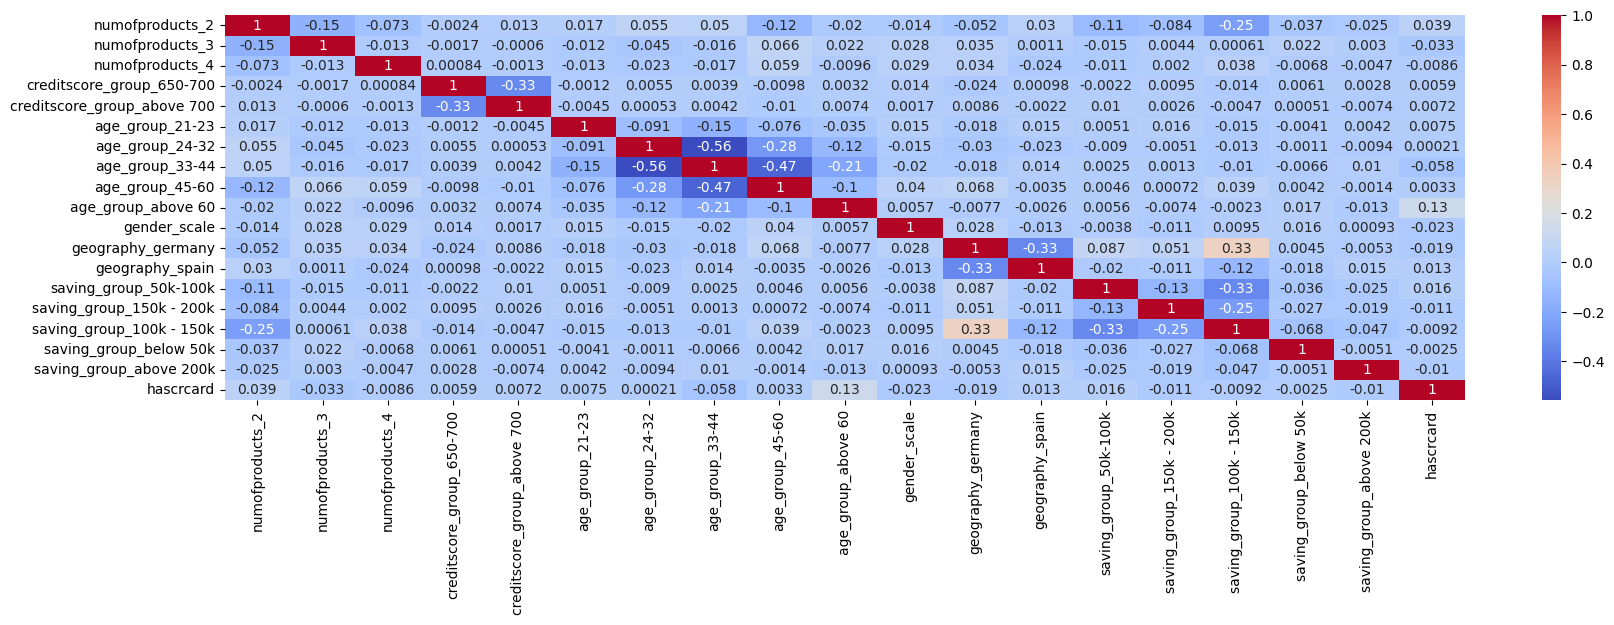

In [342]:
plt.figure(figsize=(20,5))
sns.heatmap(X_train.corr(),annot=True,cmap='coolwarm')
plt.show()

In [343]:
from sklearn.ensemble import RandomForestClassifier

In [344]:
from scipy.stats import randint

In [345]:
rf_accuracy_list = []
rf_precision_list = []
rf_recall_list = []
rf_f1_list = []
rf_model = RandomForestClassifier(class_weight='balanced',random_state=42)
rand_search = RandomizedSearchCV(rf_model,param_distributions={'n_estimators':randint(50,500),'max_depth':randint(1,20)},cv=5,n_jobs=-1,n_iter=5,random_state=42)
for train_index,test_index in kf.split(X,Y):
    rfX_train,rfX_test = X.iloc[train_index],X.iloc[test_index]
    rfY_train,rfY_test = Y.iloc[train_index],Y.iloc[test_index]

    rand_search.fit(rfX_train,rfY_train)
    best_rf = rand_search.best_estimator_
    rfY_pred = best_rf.predict(rfX_test)

    rf_accuracy_list.append(accuracy_score(rfY_test,rfY_pred))
    rf_precision_list.append(precision_score(rfY_test,rfY_pred))
    rf_recall_list.append(recall_score(rfY_test,rfY_pred))
    rf_f1_list.append(f1_score(rfY_test,rfY_pred))

print(f'Avg accuracy:{np.mean(rf_accuracy_list)}')
print(f'Avg precision:{np.mean(rf_precision_list)}')
print(f'Avg recall:{np.mean(rf_recall_list)}')
print(f'Avg f1:{np.mean(rf_f1_list)}')

Avg accuracy:0.799941220610305
Avg precision:0.5066134076152969
Avg recall:0.7015127426892133
Avg f1:0.5880647150649991


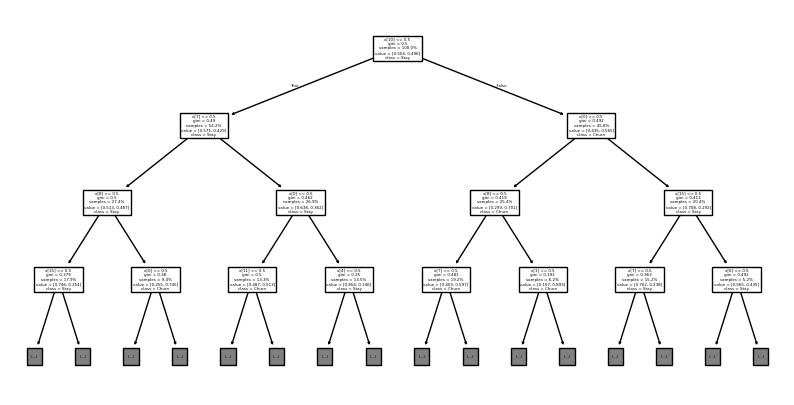

In [346]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,5))
plot_tree(
    best_rf.estimators_[0],
    max_depth=3,
    class_names=['Stay','Churn'],
    proportion=True,
    impurity=True

)
plt.show()

In [347]:
pd.DataFrame(
    {'feature':X.columns,
     'importance':best_rf.feature_importances_ * 100
    }
).sort_values(by='importance',ascending=False)

,feature,importance
0,numofproducts_2,26.753830
8,age_group_45-60,21.598666
6,age_group_24-32,8.081022
1,numofproducts_3,7.652385
18,hascrcard,6.781172
11,geography_germany,6.364066
7,age_group_33-44,3.959088
15,saving_group_100k - 150k,3.699703
10,gender_scale,3.210359
2,numofproducts_4,1.801390


In [348]:
bank_account_df.to_csv(f'{folder}/cleaned_data.csv')

In [349]:
bank_account_df.columns

Index(['customerid', 'balance', 'numofproducts', 'hascrcard', 'tenure',
       'isactivemember', 'exited', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'estimatedsalary', 'estimatedsalary_group',
       'age_group', 'saving', 'saving_group', 'creditscore_group',
       'numofproducts_scale', 'creditscore_scale', 'age_scale', 'gender_scale',
       'geography_germany', 'geography_spain', 'age_group_21-23',
       'age_group_24-32', 'age_group_33-44', 'age_group_45-60',
       'age_group_above 60', 'numofproducts_2', 'numofproducts_3',
       'numofproducts_4', 'saving_group_below 50k', 'saving_group_50k-100k',
       'saving_group_100k - 150k', 'saving_group_150k - 200k',
       'saving_group_above 200k', 'creditscore_group_650-700',
       'creditscore_group_above 700', 'stay_proba', 'exit_proba', 'predicted'],
      dtype='object')

In [350]:
bank_account_df['estimatedsalary_group'].unique()

['100k - 150k', '50k - 100k', '1k-20k', '20k-50k', '150k - 200k', 'below 1k']
Categories (7, object): ['below 1k' < '1k-20k' < '20k-50k' < '50k - 100k' < '100k - 150k' < '150k - 200k' < 'above 200k']